## Praca zaliczeniowa - Łukasz Bijak

#### Analiza wpływu mocy oraz wielkości silnika na cenę samochodu za pomocą regresji liniowej:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data=pd.read_csv('cars.csv')

In [3]:
# Sprawdzam nagłówki danych:
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [4]:
# Do naszego modelu użyję kolumn: Horsepower,EngineSize, MSRP
# w tym celu przekształcam dane w kolumnie MSRP na zmiennoprzecinkowe:
data['MSRP'] = data['MSRP'].str[1:].str.replace(',','.')
data['MSRP'] = data['MSRP'].astype(float)

In [5]:
data = data[['Horsepower','EngineSize','MSRP']]
data.head()

,Horsepower,EngineSize,MSRP
0,265,3.5,36.945
1,200,2.0,23.820
2,200,2.4,26.990
3,270,3.2,33.195
4,225,3.5,43.755


In [6]:
# Sprawdzam korelację pomiędzy danymi:
data.corr()

,Horsepower,EngineSize,MSRP
Horsepower,1.000000,0.787435,0.826945
EngineSize,0.787435,1.000000,0.571753
MSRP,0.826945,0.571753,1.000000


***Interpetacja***: widzimy sliną korelację ceny i mocy silnika, oraz mniejszą ceny i wielkości silnika

Text(0.5, 1.0, 'Cena producenta (s tys.$) - MSRP')

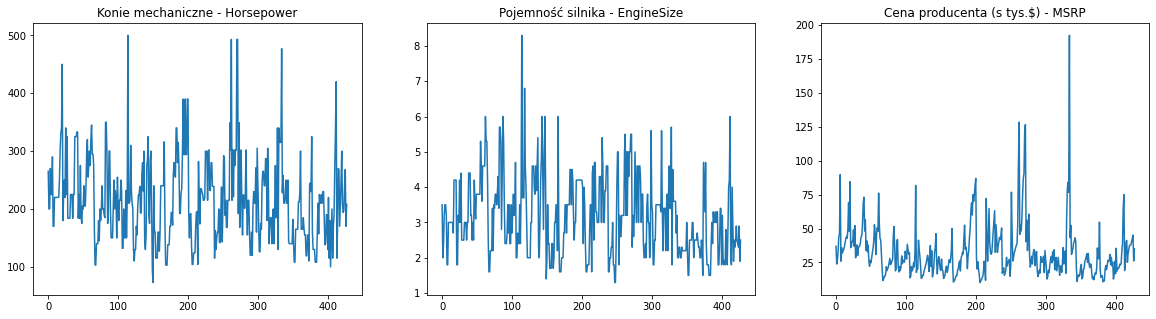

In [7]:
# Sprawdzam rozkład danych:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.plot(data['Horsepower'])
ax1.set_title('Konie mechaniczne - Horsepower')
ax2.plot(data['EngineSize'])
ax2.set_title('Pojemność silnika - EngineSize')
ax3.plot(data['MSRP'] )
ax3.set_title('Cena producenta (s tys.$) - MSRP')

***Interpetacja***: widzimy, że pojawiają się wartości odstające, np. kilka silników o mocy 400-500km, czy cena ok. 190tys.  (podczas gdy większość cen oscyluje ok. 25 tys.$)

In [8]:
#Zastąpmy wartości odstające średnią:
upper_limit = data['MSRP'].mean() + 2*data['MSRP'].std()
lower_limit = data['MSRP'].mean() - 2*data['MSRP'].std()
mean = data['MSRP'].mean()
upper_limit_h = data['Horsepower'].mean() + 2*data['Horsepower'].std()
lower_limit_h = data['Horsepower'].mean() - 2*data['Horsepower'].std()
mean_h = data['Horsepower'].mean()

In [9]:
data['MSRP'] = np.where(data['MSRP']>upper_limit, mean, np.where(data['MSRP'] < lower_limit, mean, data['MSRP']))
data['Horsepower'] = np.where(data['Horsepower']>upper_limit_h, mean_h, np.where(data['Horsepower']<lower_limit_h, mean_h, data['Horsepower']))

In [10]:
# Poniżej mamy rozkład danych dla ceny (MSRP): średnia, mediana, odchylenie, etc...
data['MSRP'].describe()

count    428.000000
mean      29.618586
std       11.946188
min       10.280000
25%       20.334250
50%       27.635000
75%       35.773750
max       69.995000
Name: MSRP, dtype: float64

<AxesSubplot:>

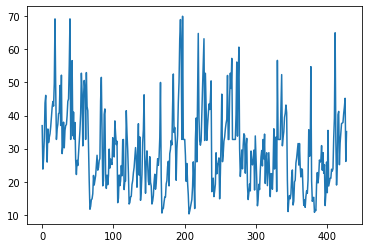

In [11]:
# Zobaczmy jak wygląda rozkład danych po uśrednieniu wartości odstających:
data['MSRP'].plot.line()

In [12]:
# Ustalamy moc silnika ("Horsepower") jako  zmienną niezależną X
X= data.iloc[:,0:1]
# Ustalamy cenę ("MSRP") jako zmienną zależną y
y= data['MSRP']

In [13]:
X.head()

,Horsepower
0,265.0
1,200.0
2,200.0
3,270.0
4,225.0


In [14]:
y.head()

0    36.945
1    23.820
2    26.990
3    33.195
4    43.755
Name: MSRP, dtype: float64

In [15]:
# Tworzymy model o nazwie "model" oraz uczymy go:
model = LinearRegression(fit_intercept = False)
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [16]:
# Sprawdzamy score:
model.score(X,y)

0.6234788953536882

***Interpertacja***: Wynik jest dość słaby - później sprawdzimy czy inną metodą uzyskamy lepszy wynik...

In [17]:
# Liczymy model coef:
model.coef_

array([0.14212172])

***Interpertacja***: jeżeli moc wzroście o 1 to cena samochodu wzroście o 0.14 (w tys. $)

In [18]:
# Sprawdźmy jaką cenę nasz model przewidzi dla samochodu z silnikiem o mocy 750km
predict_data = np.array([[750]])
model.predict(predict_data)

array([106.5912919])

***Interpertacja***: Algorytm przewiduje cenę 106 tys. dolarów 

#### Sprawdźmy jaki wynik uzyskamy przy zastosowaniu funkcji logarytmicznej lub pierwiastka:

In [19]:
# Wczytuję i poprawiam ponownie dane:
data=pd.read_csv('cars.csv')
data['MSRP'] = data['MSRP'].str[1:].str.replace(',','.')
data['MSRP'] = data['MSRP'].astype(float)
data = data[['Horsepower','MSRP']]

In [20]:
# Sprawdzam jaki będzie score przy użyciu logarytmu:
data_l = np.log(data)
X= data_l.iloc[:,0:1]
y= data_l['MSRP']
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.7522827583600046

In [21]:
# Sprawdzam jaki będzie score przy użyciu pierwiastka:
data_s = np.sqrt(data)
X= data_s.iloc[:,0:1]
y= data_s['MSRP']
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.7287824084175121

***Interpertacja***: Algorytm jest skuteczniejszy przy użyciu funkcji logarytmicznej (score = 0.75)

## Wielomianowa Regresja:

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data=pd.read_csv('cars.csv')
data['MSRP'] = data['MSRP'].str[1:].str.replace(',','.')
data['MSRP'] = data['MSRP'].astype(float)
data = data[['Horsepower','EngineSize','MSRP']]

In [24]:
# Tym razem weźmiemy pod uwagę również pojemność silnika (Engine Size)
X= data.iloc[:,0:2]
y= data['MSRP']

In [25]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

In [26]:
# Dzielimy dane na próbki: treningową i testową:
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2, random_state=42)

In [27]:
model_p = LinearRegression()
model_p.fit(X_poly_train, y_train)

LinearRegression()

In [28]:
# Sprawdźmy score dla próbki treningowej:
model_p.score(X_poly_train, y_train)

0.7980665888991788

In [29]:
# Sprawdźmy score dla próbki testowej:
model_p.score(X_poly_test, y_test)

0.8017735956968793

***Interpertacja***: Wyniki na próbkach: treningowej i testowej są zbliżone - model nie przeucza się.

#### Sprawdźmy dokładność metody:

In [30]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [31]:
y_pred = model_p.predict(X_poly_test)

In [32]:
#Liczymy Średni błąd:
mean_absolute_error(y_test, y_pred)

5.942426224702337

In [33]:
#Liczymy Średni błąd w procentach:
mean_absolute_percentage_error(y_test, y_pred)

0.18140040813059322

***Interpertacja***: Średni błąd wynosi: 18.14%

In [34]:
#Liczymy błąd średniokwardatowy (im mniejszy typ lepiej):
mean_squared_error(y_test, y_pred)

66.65388553724365

In [35]:
print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Absolute percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Absolute Error : 5.942426224702337
Mean Absolute percentage Error: 0.18140040813059322
Mean Squared Error: 66.65388553724365


#### Z powyższego wynika, iż, wyższy score uzyskaliśmy w przypadku 
#### regresji wielomianowej (0.80) niż w przypadku regresji liniowej (0.62)
#### Aby jeszcze poprawić wyniki, możemy np. manipulować parametrami: degree, test_size, 
#### Możemy również lepiej przygotować dane (ustandaryzować)